# Udemy Course Data Analysis
### This script performs data cleaning, analysis, and visualization on Udemy courses data. 
### We explore pricing trends, subscriber counts, course structures, and publishing trends.

## Steps Coverd:
### 1.Installing Kaggle and importing the data set
### 2.Import Libraries
### 3.Data Cleaning and Processing
### 4. Data Analysis and Visualizations
### 5. Export Cleaned Data for Tableau

# 1.Installing Kaggle and importing the data set

In [216]:
# Install kaggle API
!pip install kaggle

In [218]:
# verify kaggle is installed
import kaggle
print("Kaggle API is installed")

Kaggle API is installed


In [220]:
# list the datasets
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
abdulmalik1518/mobiles-dataset-2025                              Mobiles Dataset (2025)                            20KB  2025-02-18 06:50:24           6184        106  1.0              
asinow/car-price-dataset                                         Car Price Dataset                                135KB  2025-01-26 19:53:28          22998        370  1.0              
mahmoudelhemaly/students-grading-dataset                         Student Performance & Behavior Dataset           508KB  2025-02-17 17:38:46           4980         98  1.0              
samikshadalvi/lungs-diseases-dataset                             Lungs

In [222]:
!kaggle datasets list -s "udemy"

ref                                                             title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
andrewmvd/udemy-courses                                         Udemy Courses                                        200KB  2020-05-17 00:01:42          21982        330  1.0              
thedevastator/udemy-courses-revenue-generation-and-course-anal  Udemy Courses                                        429KB  2024-03-10 19:13:04           6692        103  1.0              
hossaingh/udemy-courses                                         Udemy Courses                                        613MB  2022-11-21 01:29:36           2738         54  1.0              
jilkothari/finance-accounting-courses-udemy-13k-course 

In [224]:
# Download the dataset
!kaggle datasets download -d andrewmvd/udemy-courses --unzip

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/udemy-courses
License(s): other
100%|█████████████████████████████████████████| 200k/200k [00:00<00:00, 563kB/s]
100%|█████████████████████████████████████████| 200k/200k [00:00<00:00, 562kB/s]


# 2.Import Libraries

In [226]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
# Checking the present files in the directory
print(os.listdir())

['.config', 'Music', '.kaggle', '.condarc', '.DS_Store', '.dbvis', '.CFUserTextEncoding', 'Udemy-backup.ipynb', '.xonshrc', 'anaconda_projects', 'Untitled.ipynb', 'Full Disk Access', '.zshrc', '.psql_history', 'Pictures', 'Udemy.ipynb', 'Entertainment', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', '.pgadmin', 'Public', '.tcshrc', '.anaconda', 'Movies', 'udemy_courses.csv', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.vscode', '.bash_profile', 'Photos', 'Work-Related', 'Downloads', '.continuum', '.zsh_sessions', '.conda']


# 3. Load & Explore Data

In [230]:
# Read the cvs file
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [232]:
df.shape

(3678, 12)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


# 4.Data Cleaning & Processing

In [236]:
# Drop unnecessary columns--> url
df.drop('url', axis=1, inplace= True)

In [238]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [240]:
df.dtypes

course_id                int64
course_title            object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [242]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [244]:
# published_timestamp is string, needs to be converted into a datetime
df['published_timestamp']= pd.to_datetime(df['published_timestamp'])

In [246]:
df.duplicated().sum()

6

In [248]:
df[df.duplicated(subset=['course_id', 'course_title'], keep=False)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
778,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
787,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design


In [250]:
df[df.duplicated(subset=['course_id', 'course_title'], keep='first')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [252]:
df=df.drop_duplicates()

In [23]:
# Check unique values 'level' and 'subject' (boolean values)

print(df['level'].unique())
print(df['subject'].unique())

['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [254]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


#### Now, I want to ensure that my listings and entries represent valid courses. The key columns that can help me verify this are num_lectures and content_duration. If there are listings with unusual values, it may indicate incorrect entries. Additionally, I suspect a high number of outliers in the num_lectures column.
#### The statistics of num_lectures suggest that the data is highly skewed, meaning there are extreme values affecting the distribution.
#### One course has 779 lectures, which is extremely high. (  This high value might be a legitimate case (e.g., a massive bootcamp course) or a data entry mistake.)
#### Some courses have 0 lectures, which may indicate missing or incorrect data.
#### There is a significant gap between the mean (40.14) and the median (25).

<function matplotlib.pyplot.show(close=None, block=None)>

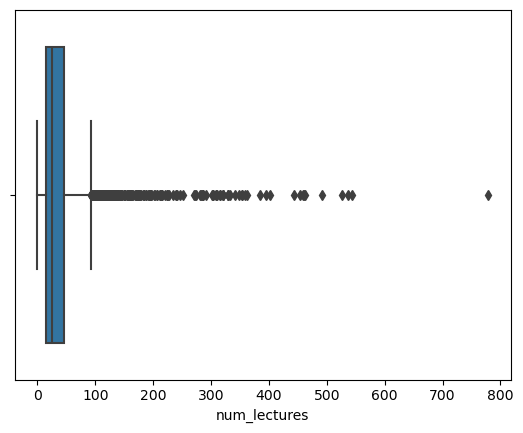

In [256]:
# Use a boxplot
sns.boxplot(x=df['num_lectures'])
plt.show

#### As the box plot indicates, I need to take a closer look at the data by calculating the upper bound and identifying the outliers for further investigation. In this case, it is more likely that the outliers are only those above the upper bound.

In [259]:
# IQR calculation
Q1 = df['num_lectures'].quantile(0.25)
Q3 = df['num_lectures'].quantile(0.75)
IQR = Q3 - Q1

In [261]:
# Lower and upper bounds calculation
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Outlier Threshold (Upper Bound): {upper_bound}")

Q1: 15.0, Q3: 46.0, IQR: 31.0
Outlier Threshold (Upper Bound): 92.5


In [263]:
# finding outliers
outliers = df[df['num_lectures'] > upper_bound ]
print(outliers[['course_title','num_lectures']])

                                           course_title  num_lectures
1     Complete GST Course & Certification - Grow You...           274
38    Beginner to Pro in Excel: Financial Modeling a...           138
39          The Complete Investment Banking Course 2017           110
40           The Complete Financial Analyst Course 2017           174
41    Python for Finance: Investment Fundamentals & ...           103
...                                                 ...           ...
3647  17 Complete JavaScript   projects explained st...           106
3652  Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...           119
3654  The Extreme Web Development Course - For Begin...           152
3658  The Complete Web Developer Course - Build 20 W...           304
3672    jQuery UI in Action: Build 5 jQuery UI Projects           140

[291 rows x 2 columns]


#### I have 291 rows of outliers out of a total of 3,678 entries, which accounts for 7.9% of my dataset. Since this is more than 5%, I want to investigate them further before making any decisions.

In [265]:
display(outliers)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
38,321410,Beginner to Pro in Excel: Financial Modeling a...,True,195,22257,2697,138,All Levels,7.5,2014-11-25 23:00:40+00:00,Business Finance
39,965832,The Complete Investment Banking Course 2017,True,195,8575,809,110,All Levels,5.5,2016-10-10 16:16:26+00:00,Business Finance
40,648826,The Complete Financial Analyst Course 2017,True,195,24481,2347,174,All Levels,10.0,2016-01-21 01:38:48+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3647,975916,17 Complete JavaScript projects explained st...,True,185,327,26,106,Beginner Level,9.5,2016-10-26 14:03:38+00:00,Web Development
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,True,200,279,37,119,All Levels,10.0,2017-04-25 00:57:35+00:00,Web Development
3654,949134,The Extreme Web Development Course - For Begin...,True,200,1420,62,152,All Levels,5.5,2016-09-04 20:51:08+00:00,Web Development
3658,459922,The Complete Web Developer Course - Build 20 W...,True,20,2650,61,304,All Levels,15.5,2015-03-26 22:11:15+00:00,Web Development


#### There should be a logical and sensible relationship between content_duration and num_lectures. For example, if a course has 152 lectures but only 5 hours of content, it seems unusual. I plan to investigate this further, but for now, I want to first examine the highest outliers and compare the difference between the first and second highest outliers.

In [267]:
outliers_sorted = df[df['num_lectures']> upper_bound].sort_values(by = 'num_lectures', ascending = False)
display(outliers_sorted)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2707,79154,Back to School Web Development and Programming...,True,200,18170,117,779,Beginner Level,44.5,2013-08-19 14:53:00+00:00,Web Development
160,543242,Learn to Trade The News,True,200,1924,351,544,All Levels,46.5,2015-07-16 22:03:29+00:00,Business Finance
2748,978728,"Thoughtful Web Development Course: HTML, Vue.j...",True,200,842,144,536,All Levels,25.0,2016-10-11 14:18:27+00:00,Web Development
561,375594,Financial Management - A Complete Study,True,190,1941,128,527,All Levels,71.5,2014-12-22 16:57:30+00:00,Business Finance
3004,481696,Code & Grow Rich: Earn More As An Entrepreneu...,True,200,7211,52,491,All Levels,57.0,2016-02-10 01:09:19+00:00,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
1261,1219326,Diventa un professionista del Graphic Design,True,200,185,10,94,All Levels,17.5,2017-05-24 17:02:19+00:00,Graphic Design
2557,860812,JavaScript the Basics - JavaScript for Beginners,True,120,4028,674,93,Beginner Level,9.0,2016-06-09 15:13:54+00:00,Web Development
2424,988678,Curso de piano 101 - Tocando partituras y acor...,True,170,245,26,93,All Levels,4.5,2016-10-28 16:32:47+00:00,Musical Instruments
2810,621022,Projects in MongoDB - Learn MongoDB Building P...,True,50,4628,247,93,All Levels,12.0,2015-09-28 20:22:39+00:00,Web Development


#### Since the first outlier (779 lectures) is significantly higher than the second one (544 lectures), and afterward, the numbers show a reasonable decline, it is likely that the first outlier is distorting the dataset. Therefore, I have decided to remove it. I also want to remove the entry with 0 number of lectures and 0 content duration.

In [269]:
df = df[df['num_lectures'] !=779]

In [271]:
zero_lectures = df[df['num_lectures']== 0]
display(zero_lectures)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,True,20,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance


In [273]:
df = df[df['num_lectures'] !=0]

In [275]:
zero_content_duration = df[df['content_duration']== 0]
display(zero_content_duration)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [277]:
# Check the stats again
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.670000e+03,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000
mean,6.760735e+05,66.079019,3187.374659,156.424796,39.949864,4.087711
std,3.430230e+05,61.007770,9487.321887,936.429987,48.928555,6.022269
min,8.324000e+03,0.000000,0.000000,0.000000,4.000000,0.133333
25%,4.078430e+05,20.000000,112.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608700e+05,95.000000,2546.000000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,544.000000,78.500000


#### I do the calculations again, but since the number are not changed drastically it is unlikely for us to have a big difference there.

In [279]:
# IQR calculation
Q1 = df['num_lectures'].quantile(0.25)
Q3 = df['num_lectures'].quantile(0.75)
IQR = Q3 - Q1

In [281]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Outlier Threshold (Upper Bound): {upper_bound}")

Q1: 15.0, Q3: 46.0, IQR: 31.0
Outlier Threshold (Upper Bound): 92.5


In [283]:
outliers = df[df['num_lectures'] > upper_bound ]
print(outliers[['course_title','num_lectures']])

                                           course_title  num_lectures
1     Complete GST Course & Certification - Grow You...           274
38    Beginner to Pro in Excel: Financial Modeling a...           138
39          The Complete Investment Banking Course 2017           110
40           The Complete Financial Analyst Course 2017           174
41    Python for Finance: Investment Fundamentals & ...           103
...                                                 ...           ...
3647  17 Complete JavaScript   projects explained st...           106
3652  Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...           119
3654  The Extreme Web Development Course - For Begin...           152
3658  The Complete Web Developer Course - Build 20 W...           304
3672    jQuery UI in Action: Build 5 jQuery UI Projects           140

[290 rows x 2 columns]


#### Now I want to take a look at the relationship between number ot lectures and course duration.

<function matplotlib.pyplot.show(close=None, block=None)>

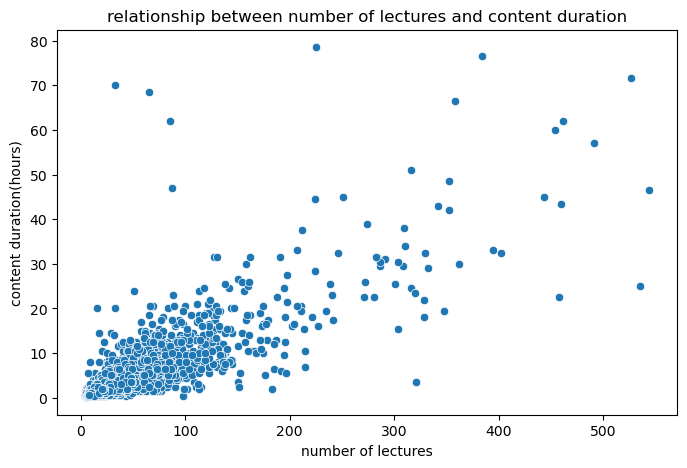

In [285]:
# Create a scatter plot to see the relationship between number of lectures and course duration

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['num_lectures'], y=df['content_duration'])
plt.xlabel('number of lectures')
plt.ylabel('content duration(hours)')
plt.title('relationship between number of lectures and content duration')
plt.show

#### Generally there is a positive trend and more lectures tend to have longer durations, but the relation ship is not perdectly linear, dense cluster is between 0-100 lectures and under 10 hours.
#### My focus is still on outliers, some courses are more than 300 lectures but still have less than 10 hours time, it can be an incorrect label or very short lectures and I wand to investigate them.

In [287]:
# correlation coefficient
correlation = df[['num_lectures', 'content_duration']].corr()
print(correlation)

                  num_lectures  content_duration
num_lectures          1.000000          0.803571
content_duration      0.803571          1.000000


#### The correlation is strong.
#### now I want to investigate the relationship in order to decide which courses are more likely to be false entries so I can decide wether to remove them or not.

In [289]:
# Calculate time spent per lecture
df['duration_per_lecture']= df['content_duration'] / df['num_lectures']

In [291]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,duration_per_lecture
count,3.670000e+03,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000
mean,6.760735e+05,66.079019,3187.374659,156.424796,39.949864,4.087711,0.107437
std,3.430230e+05,61.007770,9487.321887,936.429987,48.928555,6.022269,0.075178
min,8.324000e+03,0.000000,0.000000,0.000000,4.000000,0.133333,0.005272
25%,4.078430e+05,20.000000,112.000000,4.000000,15.000000,1.000000,0.066667
50%,6.879170e+05,45.000000,912.000000,18.000000,25.000000,2.000000,0.093358
75%,9.608700e+05,95.000000,2546.000000,67.000000,46.000000,4.500000,0.130435
max,1.282064e+06,200.000000,268923.000000,27445.000000,544.000000,78.500000,2.121212


#### If a course has more than 100 lectures but a very short total content duration, it might be an incorrect entry. Therefore, I want to identify courses where num_lectures falls within the outlier range and duration_per_lecture is less than 5 minutes (0.1 hours).

In [293]:
suspicious_courses = df[(df['num_lectures']> upper_bound) & (df['duration_per_lecture'] < 0.1)]
display(suspicious_courses[['course_title', 'num_lectures','content_duration','duration_per_lecture']])

,course_title,num_lectures,content_duration,duration_per_lecture
38,Beginner to Pro in Excel: Financial Modeling a...,138,7.5,0.054348
39,The Complete Investment Banking Course 2017,110,5.5,0.050000
40,The Complete Financial Analyst Course 2017,174,10.0,0.057471
41,Python for Finance: Investment Fundamentals & ...,103,6.5,0.063107
44,Black Algo Trading: Build Your Trading Robot,227,16.0,0.070485
...,...,...,...,...
3609,Querying Microsoft SQL Server 2012 - (Exam No....,115,6.5,0.056522
3647,17 Complete JavaScript projects explained st...,106,9.5,0.089623
3652,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,119,10.0,0.084034
3654,The Extreme Web Development Course - For Begin...,152,5.5,0.036184


#### I have identified 167 entries that appear to be incorrect, which accounts for 4.5% of the entire dataset. Therefore, I have decided to remove them.

In [296]:
df_cleaned = df.drop(suspicious_courses.index)

In [298]:
df_cleaned.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,duration_per_lecture
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,0.029412
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,0.142336
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,0.049020
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,0.083333
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,0.076923


In [300]:
df_cleaned.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,duration_per_lecture
count,3.503000e+03,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000
mean,6.765338e+05,64.209249,3082.172709,137.869540,33.970882,3.749895,0.109371
std,3.437386e+05,60.127434,9309.096520,862.788023,36.909180,5.724359,0.076259
min,8.324000e+03,0.000000,0.000000,0.000000,4.000000,0.133333,0.011628
25%,4.068710e+05,20.000000,104.000000,4.000000,14.000000,1.000000,0.068182
50%,6.898680e+05,40.000000,876.000000,17.000000,24.000000,2.000000,0.094828
75%,9.605560e+05,95.000000,2472.000000,61.000000,41.000000,4.000000,0.133333
max,1.282064e+06,200.000000,268923.000000,27445.000000,527.000000,78.500000,2.121212


# 4. Data Analysis and Visualizations

### I want to analyze the pricing distribution to determine whether most courses are free or paid.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


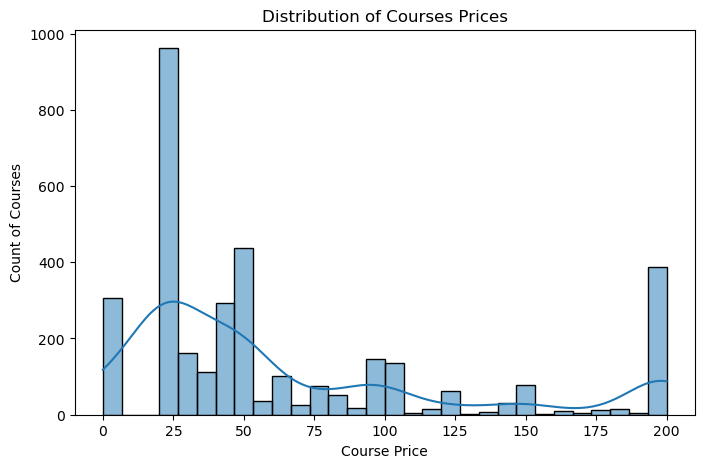

In [308]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.xlabel("Course Price")
plt.ylabel("Count of Courses")
plt.title("Distribution of Courses Prices")
plt.show()

#### The price distribution visualization shows that most Udemy courses are priced at 25, with additional peaks at 50 and 200. There is also a significant number of free courses (0), suggesting that Udemy offers many promotional or introductory courses. The mid-range pricing between 75 and 150 has noticeably fewer courses, indicating a preference for either budget-friendly or premium-tier pricing. The clear pricing tiers suggest that Udemy follows a structured pricing strategy, and the $200 price spike likely represents high-end or specialized courses.
#### I want to group the pricing and to see how many courses are in each group, since the courses are withing 0 to 200, I follow the logic below:
#### Price Ranga/ Category Name
#### Free(0)/ Free
#### 1-25 / Very Cheap
#### 26-50 / Affordable
#### 51-100 / Moderate
#### 101- 150 / Expensive
#### 151-200+ / Very Expensive

In [310]:
# Define bin labels
price_bins = [0 ,1 , 25, 50, 100, 150, 201]
price_labels = ["Free", "Very Cheap", "Affordable", "Moderate", "Expensive", "Very Expensive"]

# Categorize price labels with price bins
df_cleaned['price_category'] = pd.cut(df_cleaned['price'], bins=price_bins, labels=price_labels, right=False)

# count courses in each price category
price_distribution = df_cleaned['price_category'].value_counts() 
display(price_distribution)

price_category
Moderate          892
Very Cheap        813
Affordable        717
Very Expensive    516
Free              307
Expensive         258
Name: count, dtype: int64

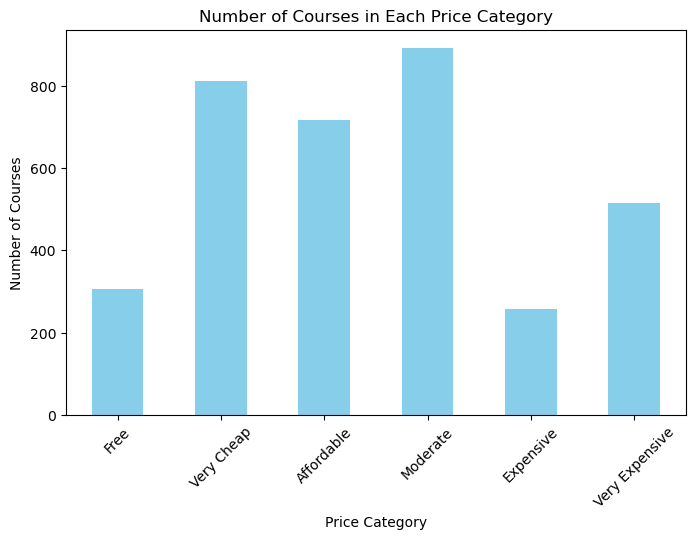

In [312]:
plt.figure(figsize=(8,5))
price_distribution.sort_index().plot(kind= 'bar', color='skyblue')

plt.xlabel("Price Category")
plt.ylabel("Number of Courses")
plt.title("Number of Courses in Each Price Category")
plt.xticks(rotation=45)
plt.show()

#### The visualization shows that most courses are in the Moderate, Very Cheap, and Affordable categories, with Moderate-priced courses being the most common. Free courses are present but fewer than paid ones, while Expensive courses are the least common, indicating Udemy's focus on budget-friendly pricing with some premium offerings.
#### Now I want to see which category has the most subscribers

/var/folders/hq/_gnsfjyd47q9z3ll9llqlfpw0000gn/T/ipykernel_21632/985012189.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscribers_per_price_category = df_cleaned.groupby('price_category')['num_subscribers'].sum().sort_values(ascending=False)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


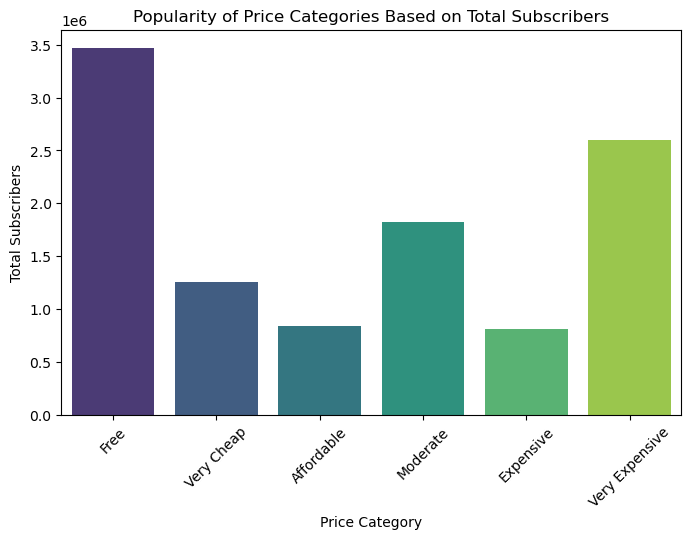

In [314]:
# Aggregate total subscribers per price category
subscribers_per_price_category = df_cleaned.groupby('price_category')['num_subscribers'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=subscribers_per_price_category.index, y=subscribers_per_price_category.values, palette="viridis")

plt.xlabel("Price Category")
plt.ylabel("Total Subscribers")
plt.title("Popularity of Price Categories Based on Total Subscribers")
plt.xticks(rotation=45)
plt.show()

#### At this stage, I want to identify which subjects have the highest number of subscribers.

In [317]:
# Aggregate total subscribers per subject
subscribers_per_subject = df_cleaned.groupby('subject')['num_subscribers'].sum().sort_values(ascending=False)
display(subscribers_per_subject)

subject
Web Development        7415610
Business Finance       1745705
Graphic Design         1041065
Musical Instruments     594471
Name: num_subscribers, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

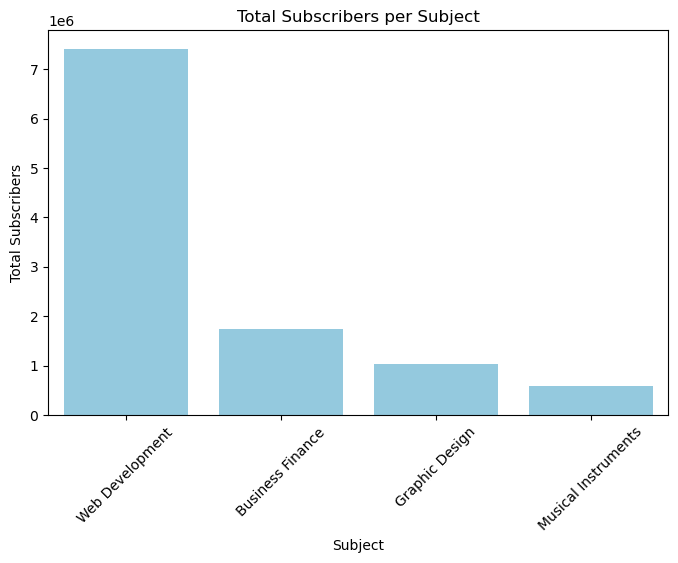

In [319]:
plt.figure(figsize=(8,5))
sns.barplot(x=subscribers_per_subject.index, y=subscribers_per_subject.values, color= 'skyblue')
plt.xlabel("Subject")
plt.ylabel("Total Subscribers")
plt.title("Total Subscribers per Subject")
plt.xticks(rotation=45)
plt.show

#### The visualization shows that free courses attract the highest number of subscribers, followed by very expensive and moderate-priced courses. Lower-priced courses have fewer subscribers, while expensive courses have the least, suggesting that users either prefer free content or are willing to invest in premium courses.
#### Now, I want to analyze the price category for each subject to determine whether the distribution is even or if certain subjects have more free courses.

In [322]:
# Agrregate price category for each subject
price_category_per_subject = df_cleaned.groupby('subject')['price_category'].value_counts().unstack()
display(price_category_per_subject)

price_category,Free,Very Cheap,Affordable,Moderate,Expensive,Very Expensive
subject,,,,,,
Business Finance,95,294,201,298,72,199
Graphic Design,35,199,137,102,39,74
Musical Instruments,45,140,188,204,29,28
Web Development,132,180,191,288,118,215


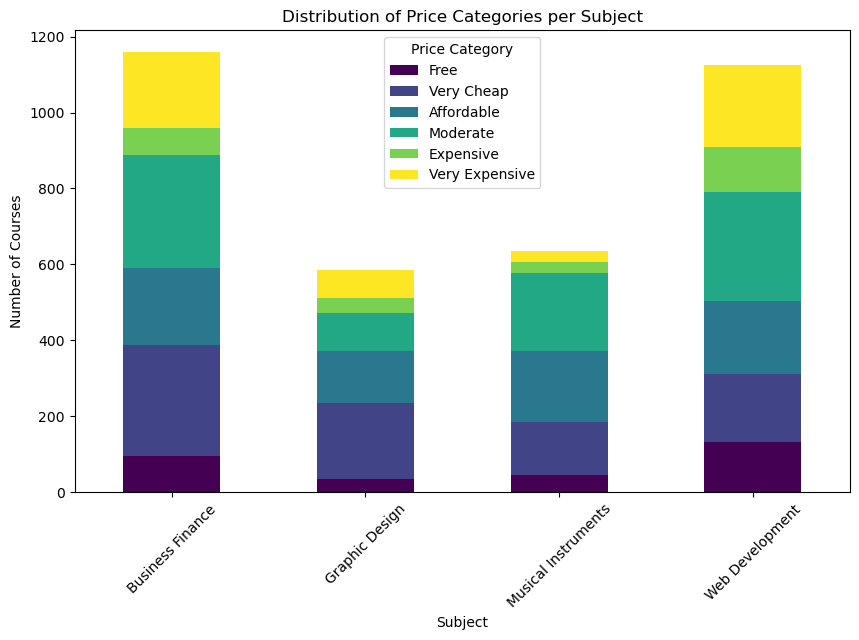

In [324]:
price_category_per_subject.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")
plt.xlabel("Subject")
plt.ylabel("Number of Courses")
plt.title("Distribution of Price Categories per Subject")
plt.xticks(rotation= 45)
plt.legend(title= "Price Category")
plt.show()

#### The visualization shows that Business Finance and Web Development have the highest number of courses across all price categories, with a significant portion in the Very Expensive and Moderate ranges. Graphic Design and Musical Instruments have fewer courses overall, with a higher concentration in affordable and very cheap categories. This suggests that pricing strategies vary by subject, with technical and business courses more likely to be priced at a premium.
#### To gain a better perspective, I want to analyze how many courses belong to each subject category.

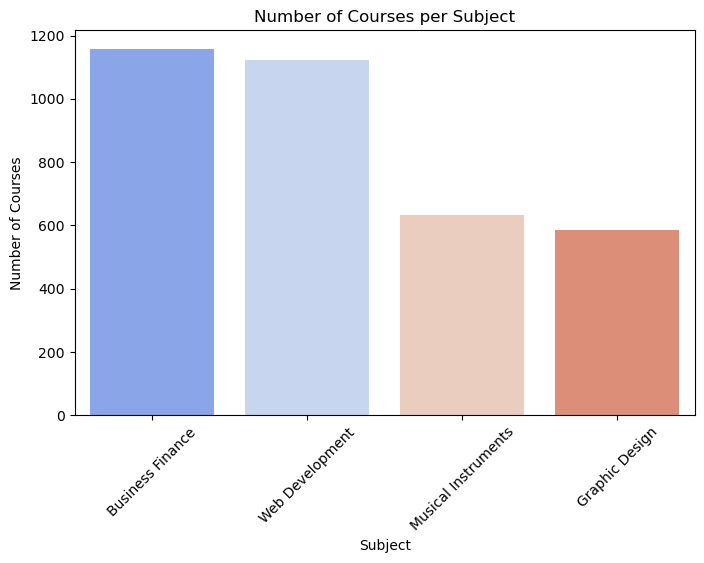

In [146]:
courses_per_subject = df_cleaned['subject'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=courses_per_subject.index, y=courses_per_subject.values, palette="coolwarm")

plt.xlabel("Subject")
plt.ylabel("Number of Courses")
plt.title("Number of Courses per Subject")
plt.xticks(rotation=45)
plt.show()

#### As Expected Business Finance and Web Development has the highest number courses.

# 5. Export Cleaned Data for Tableau

In [332]:
filename = "df_cleaned.csv"

# Detect downloads folder
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")

# Create full path
export_path = os.path.join(downloads_folder, filename)

# Export to CSV
df_cleaned.to_csv(export_path, index=False)

print(f"✅ File exported successfully to: {export_path}")

✅ File exported successfully to: /Users/fatemehshahvirdi/Downloads/df_cleaned.csv


#### I want to explore the relationship between other variables, such as the number of reviews and the number of subscribers, to analyze their correlation. For further visualization and analysis, I will use Tableau.